In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics
import seaborn as sns
from scipy import stats
from pylab import rcParams
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 10,10
rcParams['axes.linewidth'] = 4.0
rcParams['savefig.dpi'] = 500
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

In [3]:
caseCa=["apv_1RWY_Ca", "apv_1S3P_Ca", "apv_1XVJ_Ca", "bpv_1G33_Ca","bpv_1RRO_Ca"]
caseMg=["apv_1RWY_Mg", "apv_1S3P_Mg", "apv_1XVJ_Mg", "bpv_1G33_Mg", "bpv_1RRO_Mg"]

fCa=["1rwy_ca", "1s3p_ca", "1xvj_ca", "1g33_ca", "1rro_ca"]
fMg=["1rwy_mg", "1s3p_mg", "1xvj_mg", "1g33_mg", "1rro_mg"]

casedata=[]
avgCa=[]
avgMg=[]
wdir="/net/share/cad234/projects/pv/"
for i in np.arange(5):  
    fileCa= wdir + caseCa[i] + "/pbsa/MMPBSA_dG_" + caseCa[i] +"_prod1.mmpbsa"
    fileMg= wdir + caseMg[i] + "/pbsa/MMPBSA_dG_" + caseMg[i] +"_prod1.mmpbsa"
    dataCa = np.loadtxt(fileCa)
    casedata.append(dataCa)
    dataMg = np.loadtxt(fileMg)
    casedata.append(dataMg)
    sigmaCa = statistics.mean(dataCa)
    sigmaMg = statistics.mean(dataMg)
    muCa = stats.sem(dataCa, axis=None, ddof=1)
    muMg = stats.sem(dataMg, axis=None, ddof=1)
    avgCa.append(sigmaCa)
    avgMg.append(sigmaMg)
    print("Avg \u0394G and Std Err for %s is: %0.2f kcal/mol and %0.4f" % (caseCa[i],sigmaCa,muCa))
    print("Avg \u0394G and Std Err for %s is: %0.2f kcal/mol and %0.4f" % (caseMg[i],sigmaMg,muMg))
    

Avg ΔG and Std Err for apv_1RWY_Ca is: -93.33 kcal/mol and 0.7263
Avg ΔG and Std Err for apv_1RWY_Mg is: -34.31 kcal/mol and 0.3229
Avg ΔG and Std Err for apv_1S3P_Ca is: -109.28 kcal/mol and 0.8234
Avg ΔG and Std Err for apv_1S3P_Mg is: -16.48 kcal/mol and 0.2501
Avg ΔG and Std Err for apv_1XVJ_Ca is: -82.24 kcal/mol and 0.6597
Avg ΔG and Std Err for apv_1XVJ_Mg is: -20.90 kcal/mol and 0.2779
Avg ΔG and Std Err for bpv_1G33_Ca is: -89.76 kcal/mol and 0.8789
Avg ΔG and Std Err for bpv_1G33_Mg is: -38.48 kcal/mol and 0.3342
Avg ΔG and Std Err for bpv_1RRO_Ca is: -83.35 kcal/mol and 0.7013
Avg ΔG and Std Err for bpv_1RRO_Mg is: -1.43 kcal/mol and 0.2710


In [4]:
case=["\u03B1PV_1RWY", "\u03B1PV_1S3P", "\u03B1PV_1XVJ", "\u03B2PV_1G33","\u03B2PV_1RRO"]
for i in np.arange(5): 
    ddG = (avgCa[i] - avgMg[i])
    print("\u0394\u0394G for %s is %0.2f kcal/mol" % (case[i],ddG))

ΔΔG for αPV_1RWY is -59.02 kcal/mol
ΔΔG for αPV_1S3P is -92.80 kcal/mol
ΔΔG for αPV_1XVJ is -61.34 kcal/mol
ΔΔG for βPV_1G33 is -51.27 kcal/mol
ΔΔG for βPV_1RRO is -81.92 kcal/mol


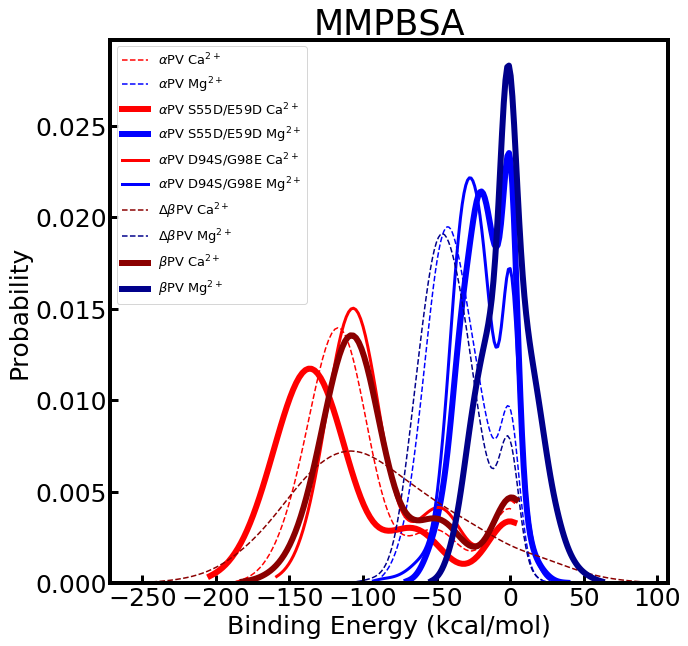

In [11]:
sns.kdeplot(np.array(casedata[0]), bw=0.3, label=r'$\alpha$PV Ca$^{2+}$', color='red', linestyle='dashed',markersize=6)
sns.kdeplot(np.array(casedata[1]), bw=0.3, label=r'$\alpha$PV Mg$^{2+}$', color='blue', linestyle='dashed',markersize=6)
sns.kdeplot(np.array(casedata[2]), bw=0.3, label=r'$\alpha$PV S55D/E59D Ca$^{2+}$', color='red', linestyle='solid',linewidth='6',markersize=10)
sns.kdeplot(np.array(casedata[3]), bw=0.3, label=r'$\alpha$PV S55D/E59D Mg$^{2+}$', color='blue', linestyle='solid',linewidth='6',markersize=10)
sns.kdeplot(np.array(casedata[4]), bw=0.3, label=r'$\alpha$PV D94S/G98E Ca$^{2+}$', color='red', linestyle='solid',linewidth='3',markersize=8)
sns.kdeplot(np.array(casedata[5]), bw=0.3, label=r'$\alpha$PV D94S/G98E Mg$^{2+}$', color='blue', linestyle='solid',linewidth='3',markersize=8)

sns.kdeplot(np.array(casedata[6]), bw=0.3, label=r'$\Delta \beta$PV Ca$^{2+}$', color='darkred', linestyle='dashed',markersize=6)
sns.kdeplot(np.array(casedata[7]), bw=0.3, label=r'$\Delta \beta$PV Mg$^{2+}$', color='darkblue', linestyle='dashed',markersize=6)
sns.kdeplot(np.array(casedata[8]), bw=0.3, label=r'$\beta$PV Ca$^{2+}$', color='darkred', linestyle='solid',linewidth='6',markersize=10)
sns.kdeplot(np.array(casedata[9]), bw=0.3, label=r'$\beta$PV Mg$^{2+}$', color='darkblue', linestyle='solid',linewidth='6',markersize=10)
plt.legend(fontsize=13,handlelength=2,loc="best")
plt.tick_params(which='both',direction='in',length=8, width=3,)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Binding Energy (kcal/mol)', fontsize=25)
plt.ylabel('Probability', fontsize=25)
plt.title('MMPBSA',fontsize=35)
plt.savefig("MMPBSA.pdf", transparent=True, bbox_inches='tight')